In [1]:
from utils import show_q

# Part 1

In [2]:
show_q(2020, 1)

## Solution

The naive solution that comes to mind is to simply compare all numbers and individually check if they sum up to 2020. But that solution needs $O(k^2)$ comparisons for $k$ numbers as input. So how can we do better? 

One clue is that if you are comparing a number $i$ with other numbers, you know that you are checking if $2020-i$ is in the list as well. Finding numbers in a list can be done on $O(\log(k))$ time if the list is sorted, and if you are comparing $l$ numbers, that adds up to $O(n\log(k))$ time which is how long it takes to sort a list in the worst case. 

But there is a yet faster, although a more memory intensive way, and that is to simply store a boolean array, where each value signfies if that value is in the input array. The catch here is that now you are at the mercy of how big each number is. If the numbers were 1002020 and -1000000 then you would have to create a huge array filled with mostly `False` values. Another catch is that we don't keep track of numbers if the are repeated, but there's only one such number (i.e. 1010) that we care about when it comes to repetitions. 

So then let's turn to the data and see what might work and what might not - 

In [24]:
with open('inputs/d1.txt') as f:
    nums = [int(l.strip()) for l in f.readlines()]

In [25]:
max(nums), min(nums)

(2009, 183)

Looks like we have all positive integers (which also means all numbers are less than 2020). So we can go ahead with the boolean array. We'll use numpy to avoid having to write loops. 

In [26]:
import numpy as np
membership = np.zeros(2021, dtype=bool) #Representing numbers from 0 to 2020
membership

array([False, False, False, ..., False, False, False])

Now in a single line of numpy foo, we can use the `nums` list as an index into the array and set those locations to `True`

In [27]:
membership[nums]=True
membership[182], membership[183]

(False, True)

Now all we need to do is compare 0 with 2020, 1 with 2019 and so on. In yet another use of numpy magic, we can simply reverse the array (so that 0 matches up with 2020) .. and check if $i$ and $2020-i$ have a true value. 
What's the catch? 1010 will be matched with itself, so we disregard it and separatelt check if it is repeated twice. 

In [28]:
sum_to_2020 = (membership[::-1] & membership).nonzero()
sum_to_2020

(array([ 455, 1565]),)

Viola, we have our answer right there. 

In [29]:
sum_to_2020[0][0] * sum_to_2020[0][1]

712075

# Part 2

The Elves in accounting are thankful for your help; one of them even offers you a starfish coin they had left over from a past vacation. They offer you a second one if you can find three numbers in your expense report that meet the same criteria.

Using the above example again, the three entries that sum to 2020 are 979, 366, and 675. Multiplying them together produces the answer, 241861950.

In your expense report, what is the product of the three entries that sum to 2020?

## Solution

Now things seem a little more tricky. The input is the same, so we know that all the numbers are positive and less than 2020. 

Retracing our steps from the previous solution, the naive solution would be to consider all the triples and to remember that it would be $O(k^3)$ now instead of $O(k^2)$. We could also consider all pairs of numbers and check for the third number's membership. As we did in the previous part, we can do this check in constant time using the boolean array from the previous part, but we'll still need to check it for $O(k^2)$. 
> We should note that for such a small array, all pairs is not too bad at all and will be fast enough for all practical purposes. So let's just do that first and get an answer



In [39]:
import itertools
sum_of_two = np.zeros(2021, dtype=bool)
sum_of_two[[n1+n2 for n1, n2 in itertools.product(nums, nums) if n1+n2<2021]]=True
sum_of_two

array([False, False, False, ...,  True,  True,  True])

Look at how fast that was, 11ms! Wooh. So now we have all possible sums of two numbers. Next we just need to repeat what we did last time. Reverse the sums of two and match it with membership

In [37]:
sum_to_three = (sum_of_two[::-1] & membership).nonzero()
sum_to_three

(array([ 183,  695, 1142]),)

Waaait! What do we have here? Looks like the three numbers just fell out and that would make sense because for each one of them (say $i$), there would have to exist a corresponding pair of numbers summing up $2020-i$. 

In [40]:
sum_to_three[0][0]*sum_to_three[0][1]*sum_to_three[0][2]

145245270

# Wait!

It kind of makes me wonder though, what are the odds! What are the odds that there is exactly one such triple. What did Eric Wastl have to do to ensure that.

If you think about it, let's say you have $k$ integers as input ($k=200$ above) and they are all between 0 and $n$ where $n$ is the sum you care about ($n=2020$). If $k$ were selected uniformly at random, then summing up pairs of them should produce a lot of numbers between 0 and $n$ that one could then find a match for. In fact for $k=200$, one would get $40000$ such numbers and the maximum would only be $4040$, which means `sum_of_two` should have been very dense. 

Let's check how dense it was for us

In [41]:
sum(sum_of_two)

368

Only 368 unique sums! And we started with 200 numbers, so we were guaranteed at least 200 unique sums. Which means these numbers weren't really random but rather generated in a way so as to reduce the number of unique sums. 

Let's look at how the numbers and sums are distributed

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

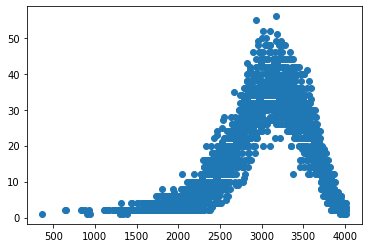

In [73]:
from collections import Counter
pair_sums = [n1+n2 for n1, n2 in itertools.product(nums, nums)]
counts = Counter(pair_sums)
plt.scatter(counts.keys(), counts.values())

Aha! The reason is that majority of the sums are greater than 2020, which makes them unusable for us. 
Had we chosen a uniform random distribution, what would we get.

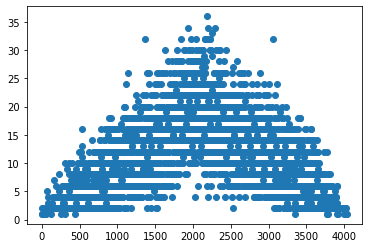

In [82]:
import random
unif_rand_nums = random.choices(range(1,2021),k=200)
unif_rand_pair_sums = [n1+n2 for n1, n2 in itertools.product(unif_rand_nums, unif_rand_nums)]
unif_rand_counts = Counter(unif_rand_pair_sums)
plt.scatter(unif_rand_counts.keys(), unif_rand_counts.values())

Let's make some prettier plots, just for the kicks and compare the two

/Users/ashwinparanjape/anaconda2/envs/AoC/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ashwinparanjape/anaconda2/envs/AoC/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


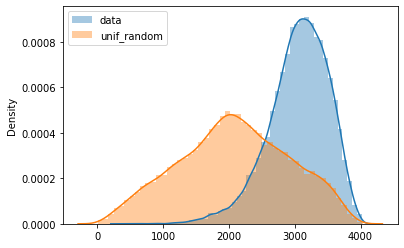

In [85]:
import seaborn as sns
sns.distplot(pair_sums, label='data')
sns.distplot(unif_rand_pair_sums, label='unif_random')
plt.legend()

The orange curve looks like a triangle, and a triangle is what we would expect as well. In essence what we're looking at here can be characterized as the sum of two random variables. And the distribution of the sum is essentially a convolution of the two individual distributions. (I'll leave that for you to figure out). 

The blue distribution though looks suspiciously like it was generated from the sum of two exponential distributions. Here's a helpful illustration from [Introduction to Probability by Grinstead and Snell](http://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/amsbook.mac.pdf)
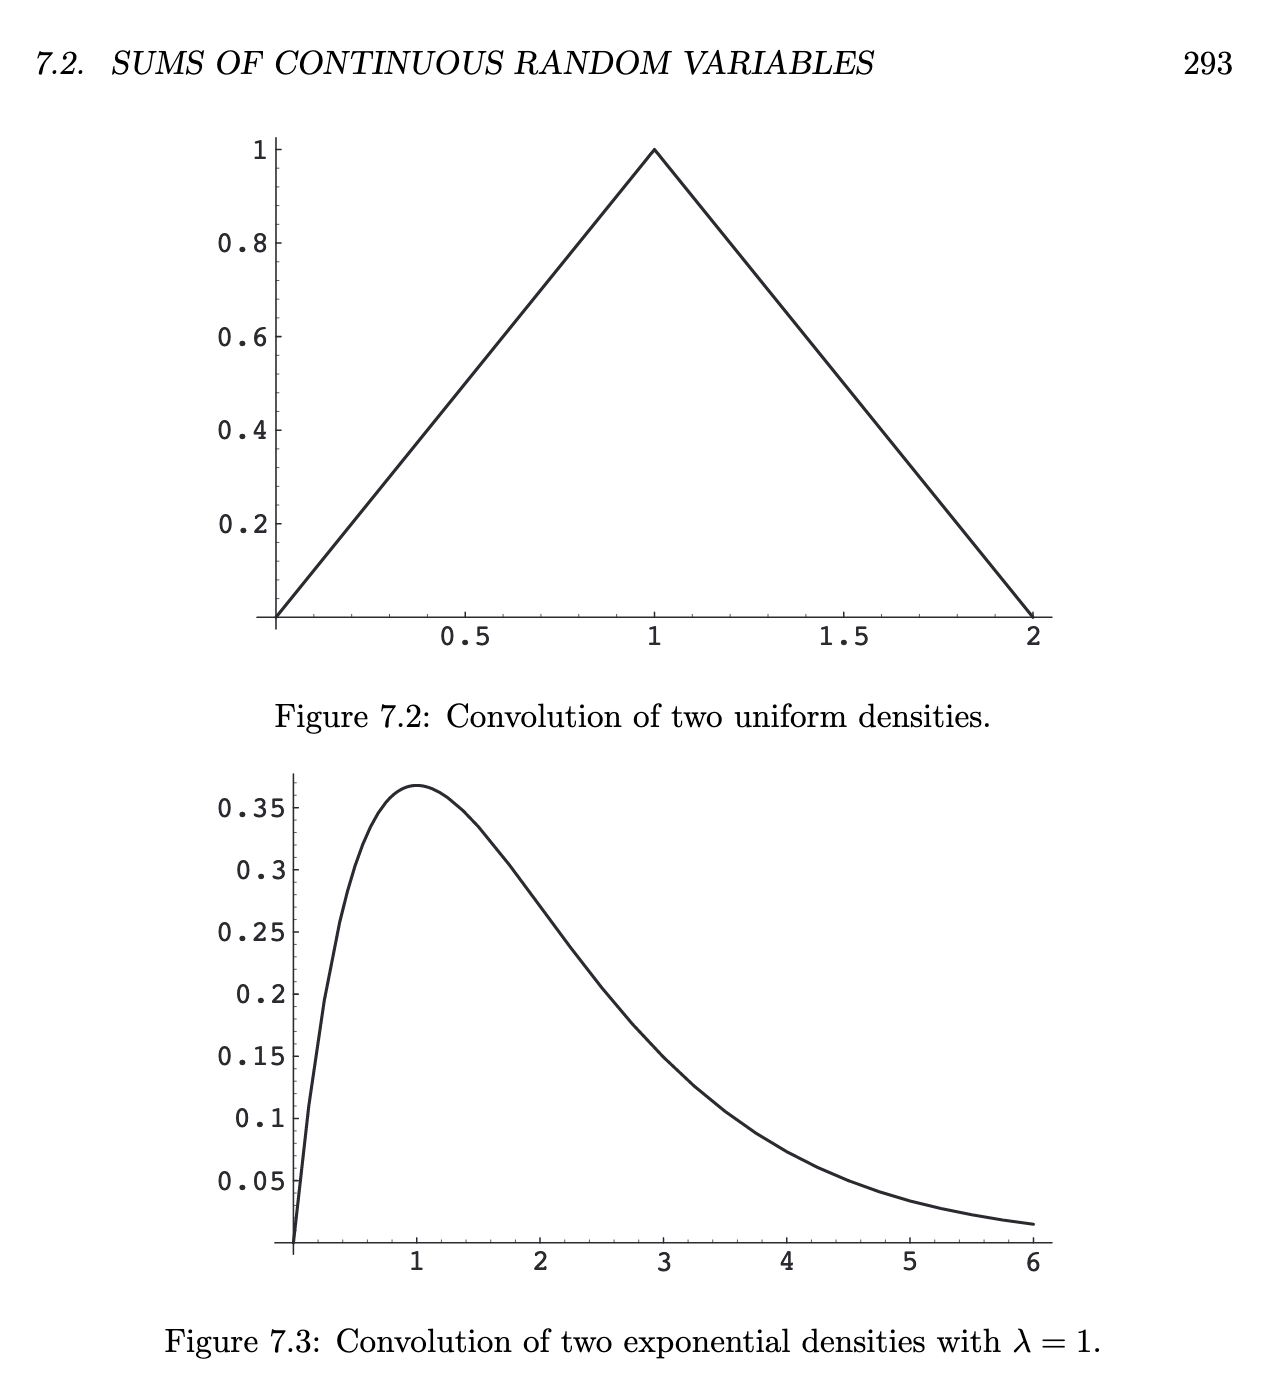

Let's plot the data distribution itself

/Users/ashwinparanjape/anaconda2/envs/AoC/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

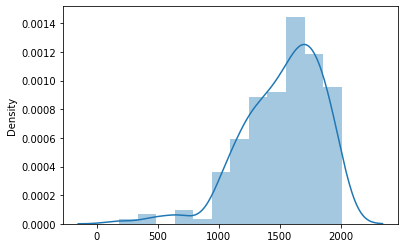

In [87]:
sns.distplot(nums)

In fact it looks like there are very few numbers below the halfway point. 

In [88]:
sum(np.array(nums)<=1010)

9

So what we could have done is simply looked at all $9*9$ pairs and checked if they have a counterpart. 

In fact the halfway point seems significant. In the triple, one cannot have two numbers more than $n/2$. 
Which means if there are few numbers less than $n/2$, we can just consider all those pairs. 

On the other hand, the sum of two numbers less than $n/2$ is less than or equal to $n$, which increases the density of our `sum_of_two` vector. So if there are many such numbers less than $n/2$, that means we can find a counterpart more quickly. This part is getting tricky.

Turns out this is a well known problem called [3SUM](https://en.wikipedia.org/wiki/3SUM) and there are some interesting but advanced algorithms to solv

In [47]:
random.choices?